# Convolution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
from lib.plotmd import plotVector
from lib.signalprocessingmd import convolution,convolution_self

## Helpers


In [3]:
TUT_NUM="06" # Lecture Number
FIG_COUNT=0  # To give each figure identical number when saving , for sorting issues
def saveFigure(desc):
    """save Figure 
    it is used after plotting it you want to save the figure
    figures will be saved in figures directory
    with file name format
    parameters:
    desc : string , describtion of the figure 
    """
    global FIG_COUNT
    global TUT_NUM
    FIG_COUNT+=1
    plt.savefig('figures/c%s-%d-%s'%(TUT_NUM,FIG_COUNT,desc))

def scaleMax(X,maxValue):
    """
    parameters:
    X: numpy array of shape (n,1)
    maxValue: the new max value in the returned array
    
    return numpy array after scaling
    """
    mx=np.max(np.abs(X))
    mul=maxValue/mx
    return X*mul

## Convolution function

$y(n)=x(n)*h(n)$

- Get value of convolution at position n

$y(k)=\sum_{l=1}^{M} x(k-l)h(l)	$

- M=h.shape[0] # length of signal h
- k=point at which we will compute convolution

## Create pulse train
- Get pulse every 200 sample
- Plot pulse train

<IPython.core.display.Javascript object>


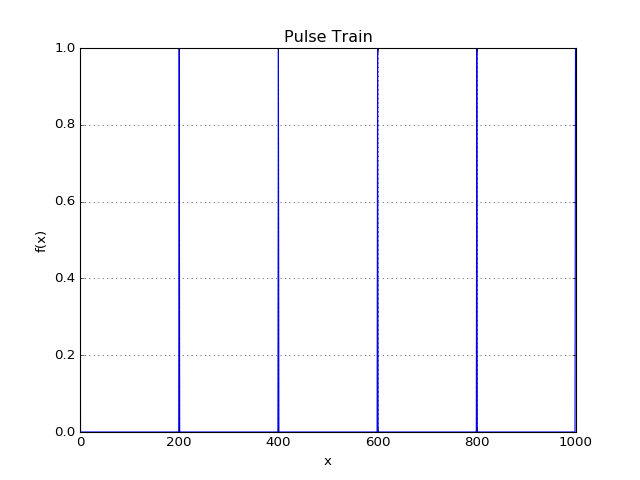

In [4]:
N=1000   # number of samples
T=5      # sec duration of the signal
dt=0.005 # sampling duration   T/N

xn=np.zeros(N).reshape(N,1)
xn[np.arange(0,1000,200)]=1    # pulse train every 200 sample
xn[999]=1
#plotting
desc="Pulse Train"
plotVector(xn,desc)
saveFigure(desc)
plt.show()

## Construct Signal

$f(t)=sin(2\pi f_0 t) e^{-\alpha t}$
- Get h(n) : sample each dt=0.005sec 
- Take first M=200 samples
- Scale max value to be maxValue=120 
- Plot this signal

<IPython.core.display.Javascript object>


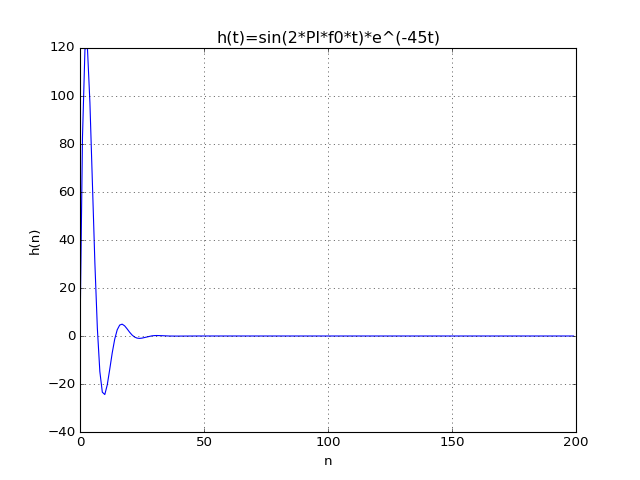

In [5]:
# create signal 
# h(t)=sin(2*PI*f0*t)*exp(-alpha*t)

M=200        # it is enough to take the first 200 values
maxValue=120 # scale y values , set max value to 120
alpha=45
f0=14        # signal frequency

t=np.arange(M).reshape((M,1))*dt    # t values at which we will take samples
hn=np.multiply(np.sin(2*np.pi*f0*t)
               ,np.exp(-alpha*t))   # sampling the signal h(t) 
hn=scaleMax(hn,maxValue)              # scaling y values , set max value to maxValue

# plotting signal
desc="h(t)=sin(2*PI*f0*t)*e^(-45t)"
plt.figure(desc)
plotVector(hn,desc,"n","h(n)")
saveFigure(desc)
plt.show()

## Convolution 
Construct convolution between signal h(n) and pulse train x(n)

$y(k)=\sum_{l=0}^{MX}x_{k-l-1}*h_l$

x : np.array of shape (N,1)

h : np.array of shape (M,1)

k : position integer k

MX : min(k,M)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Comparison_convolution_correlation.svg/1200px-Comparison_convolution_correlation.svg.png"/>

<IPython.core.display.Javascript object>


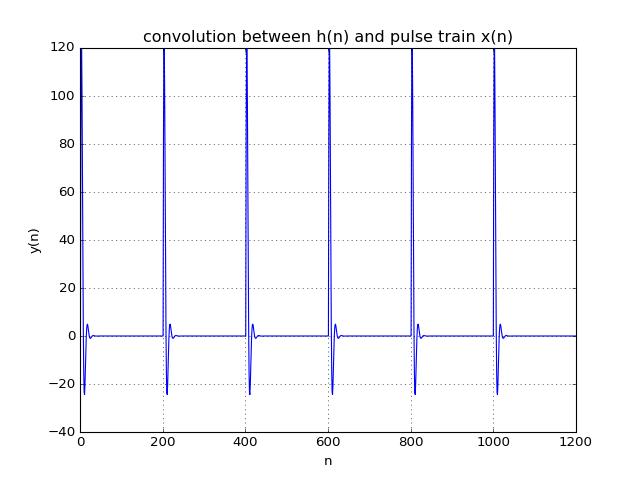

<IPython.core.display.Javascript object>


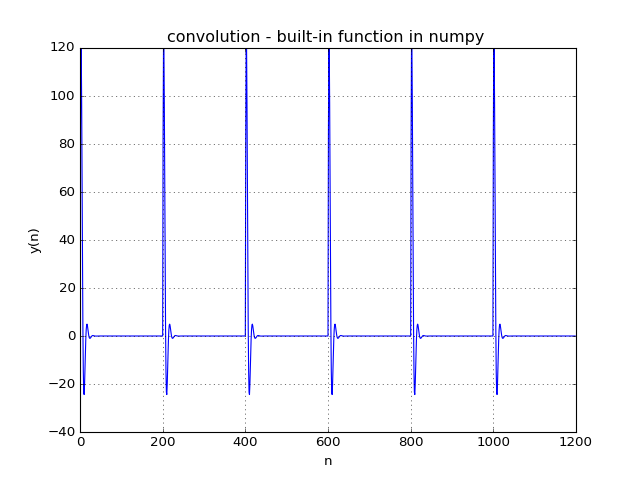

In [6]:
# construct convolution between signal h(n) and pulse train x(n)
# my implementation
yn=convolution_self(xn,hn)
desc="convolution between h(n) and pulse train x(n)"
plt.figure(desc)
plotVector(yn,desc,"n","y(n)")
saveFigure(desc)
plt.show()

#built-in implementation in numpy
yn2=np.convolve(xn.T[0],hn.T[0])
desc="convolution - built-in function in numpy "
plt.figure(desc)
plotVector(yn2,desc,"n","y(n)")
saveFigure(desc)
plt.show()